### DateTime 시각화
- 주차별 환자 입원/퇴원 추이 시각화
- 요일별 환자 입원/퇴원 추이 시각화
- hint : df_DL['날짜_datetime'].dt.day_name()

In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [34]:
pd.set_option('display.max_columns',None)
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS[:2]

Unnamed: 0 환자ID  Large Lymphocyte  Location of herniation   ODI  가족력  \
0           0  1PT              22.8                       3  51.0  0.0   
1           1  2PT              44.9                       4  26.0  0.0   

   간질성폐질환  고혈압여부  과거수술횟수  당뇨여부  말초동맥질환여부  빈혈여부  성별  스테로이드치료  신부전여부   신장  \
0       0      0       0     0         0     0   2        1      0  163   
1       0      0       0     0         0     0   1        1      0  171   

   심혈관질환  암발병여부  연령  우울증여부  입원기간      입원일자  종양진행여부    직업    체중      퇴원일자  \
0      0      0  66      0     2  20190713       0   자영업  60.3  20190716   
1      0      0  47      0     1  20190715       0  운동선수  71.7  20190716   

   헤모글로빈수치  혈전합병증여부  환자통증정도  흡연여부  통증기간(월)  수술기법  수술시간  수술실패여부      수술일자  \
0    13.66        0      10     0      1.0  TELD  68.0       0  20190715   
1    13.73        0      10     0      1.0  TELD  31.0       0  20190716   

   재발여부   혈액형  전방디스크높이(mm)  후방디스크높이(mm)  지방축적도  Instability  MF + ES  \
0     0  RH+A         16.1         12.3  282.3            0   1824.6   
1     0  RH+A         13.7          6.4  177.3            0   1737.5   

   Modic change    PI    PT  Seg Angle(raw)  Vaccum disc   골밀도  디스크단면적  디스크위치  \
0             3  51.6  36.6            14.4            0 -1.01  2048.5      4   
1             0  40.8   7.2            17.8            0 -1.14  1753.1      4   

  척추이동척도  척추전방위증  
0   Down       0  
1     Up       0

In [35]:
df_ROS['입원일자'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1894 entries, 0 to 1893
Series name: 입원일자
Non-Null Count  Dtype
--------------  -----
1894 non-null   int64
dtypes: int64(1)
memory usage: 14.9 KB


In [36]:
df_ROS['입원일자'].value_counts()

20190129    23
20190101    13
20190227    12
20190130    12
20190330    12
            ..
20141105     1
20090702     1
20090712     1
20090524     1
20170412     1
Name: 입원일자, Length: 1051, dtype: int64

In [40]:
df_ROS['입원일자_datetime'] = pd.to_string(df_ROS['입원일자'])

AttributeError: module 'pandas' has no attribute 'to_string'

In [39]:
df_ROS['입원일자_datetime'].info()

KeyError: '입원일자_datetime'

In [21]:
df_ROS['입원일자_datetime'].value_counts()

1970-01-01 00:00:00.020190129    23
1970-01-01 00:00:00.020190101    13
1970-01-01 00:00:00.020190227    12
1970-01-01 00:00:00.020190130    12
1970-01-01 00:00:00.020190330    12
                                 ..
1970-01-01 00:00:00.020141105     1
1970-01-01 00:00:00.020090702     1
1970-01-01 00:00:00.020090712     1
1970-01-01 00:00:00.020090524     1
1970-01-01 00:00:00.020170412     1
Name: 입원일자_datetime, Length: 1051, dtype: int64

In [23]:
df_ROS['퇴원일자_datetime'] = pd.to_datetime(df_ROS['퇴원일자'])

In [24]:
df_ROS[:2]

Unnamed: 0 환자ID  Large Lymphocyte  Location of herniation   ODI  가족력  \
0           0  1PT              22.8                       3  51.0  0.0   
1           1  2PT              44.9                       4  26.0  0.0   

   간질성폐질환  고혈압여부  과거수술횟수  당뇨여부  말초동맥질환여부  빈혈여부  성별  스테로이드치료  신부전여부   신장  \
0       0      0       0     0         0     0   2        1      0  163   
1       0      0       0     0         0     0   1        1      0  171   

   심혈관질환  암발병여부  연령  우울증여부  입원기간      입원일자  종양진행여부    직업    체중      퇴원일자  \
0      0      0  66      0     2  20190713       0   자영업  60.3  20190716   
1      0      0  47      0     1  20190715       0  운동선수  71.7  20190716   

   헤모글로빈수치  혈전합병증여부  환자통증정도  흡연여부  통증기간(월)  수술기법  수술시간  수술실패여부      수술일자  \
0    13.66        0      10     0      1.0  TELD  68.0       0  20190715   
1    13.73        0      10     0      1.0  TELD  31.0       0  20190716   

   재발여부   혈액형  전방디스크높이(mm)  후방디스크높이(mm)  지방축적도  Instability  MF + ES  \
0     0  RH+A         16.1         12.3  282.3            0   1824.6   
1     0  RH+A         13.7          6.4  177.3            0   1737.5   

   Modic change    PI    PT  Seg Angle(raw)  Vaccum disc   골밀도  디스크단면적  디스크위치  \
0             3  51.6  36.6            14.4            0 -1.01  2048.5      4   
1             0  40.8   7.2            17.8            0 -1.14  1753.1      4   

  척추이동척도  척추전방위증                 입원일자_datetime                 퇴원일자_datetime  
0   Down       0 1970-01-01 00:00:00.020190713 1970-01-01 00:00:00.020190716  
1     Up       0 1970-01-01 00:00:00.020190715 1970-01-01 00:00:00.020190716

In [41]:
df_DL['날짜_datetime'].dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
14995    2019
14996    2019
14997    2019
14998    2019
14999    2019
Name: 날짜_datetime, Length: 15000, dtype: int64

In [45]:
df_DL['날짜_datetime_year']=df_DL['날짜_datetime'].dt.year
df_DL['날짜_datetime_month']=df_DL['날짜_datetime'].dt.month

In [44]:
df_DL[:2]

날짜   상품명           바코드 발주가능상태  입고수량  카테고리  출고수량 날짜_datetime  \
0  2019-05-16  V2_0  8.801047e+12   발주가능   384  세탁세제    72  2019-05-16   
1  2019-05-16  V2_3  8.801047e+12   발주가능   207  세탁세제     5  2019-05-16   

   날짜_datetime_year  
0              2019  
1              2019

In [46]:
pd.pivot_table(data=df_DL, index='날짜_datetime_month', values='출고수량', aggfunc=sum)

출고수량
날짜_datetime_month       
5                  19427
6                  39397
7                  40584
8                   8670

<Axes: xlabel='날짜_datetime_month'>

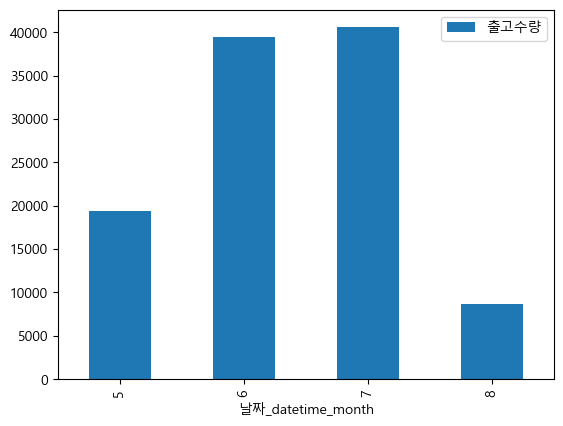

In [48]:
# 방법 1. 2차 데이터 사용시
pd.pivot_table(data=df_DL, index='날짜_datetime_month', values='출고수량', aggfunc=sum).plot(kind='bar')

<Axes: xlabel='날짜_datetime_month', ylabel='출고수량'>

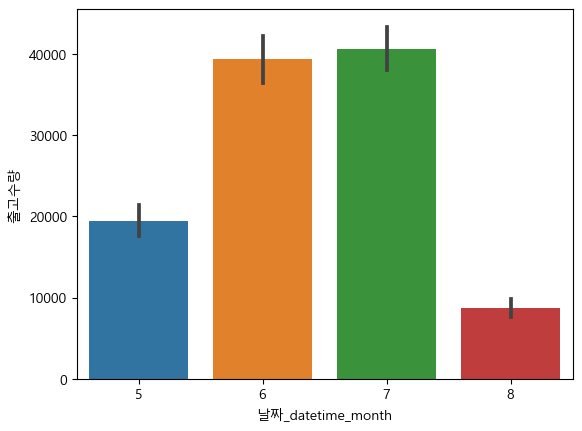

In [51]:
# 방법 2. 단순 시각화
sns.barplot(data=df_DL, x='날짜_datetime_month', y='출고수량', estimator=sum)